# Exploratory data analysis of the sentinel data




In [1]:
# load important libraries for data manupulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [13]:
# load the dataset
df= pd.read_csv('/home/drdc/Documents/repos/pestsens/2_processed/df.csv', delimiter=',')

In [14]:
# look at the dimension of the data
df.shape

(800, 12)

In [15]:
#look at the header of te data
df.head()

,category,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
0,forest,0.1601,0.2375,0.1011,0.1641,0.3235,0.3295,0.2809,0.1820,0.1574,0.1754,0.1921
1,tea,0.1669,0.2689,0.1011,0.1912,0.4362,0.4444,0.3682,0.2084,0.1557,0.1918,0.1945
2,tea,0.1992,0.2977,0.1011,0.1783,0.3951,0.4032,0.3442,0.1986,0.1654,0.1853,0.1955
3,tea,0.1590,0.2605,0.1011,0.2002,0.4599,0.4679,0.3836,0.2054,0.1556,0.1934,0.1932
4,tea,0.1599,0.2598,0.1011,0.1958,0.4520,0.4589,0.3820,0.2033,0.1546,0.1904,0.1938


In [17]:
#Rename the category name to class to avoid confision in column name
df.rename(columns={"category":"class"}, inplace=True)
df.head()

,class,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
0,forest,0.1601,0.2375,0.1011,0.1641,0.3235,0.3295,0.2809,0.1820,0.1574,0.1754,0.1921
1,tea,0.1669,0.2689,0.1011,0.1912,0.4362,0.4444,0.3682,0.2084,0.1557,0.1918,0.1945
2,tea,0.1992,0.2977,0.1011,0.1783,0.3951,0.4032,0.3442,0.1986,0.1654,0.1853,0.1955
3,tea,0.1590,0.2605,0.1011,0.2002,0.4599,0.4679,0.3836,0.2054,0.1556,0.1934,0.1932
4,tea,0.1599,0.2598,0.1011,0.1958,0.4520,0.4589,0.3820,0.2033,0.1546,0.1904,0.1938


### The structure of the dataset:

> This dataset is tidy and has already been cleaned. The data has 800 rows and 12 columns. 

### The main features of interest in this dataset:

>Here the variables of interest are the landcover class and the associated spectral from sentinel 2


## Undenstandingdata with descriptive statistics

In [18]:
#summarize numerical columns only
df.iloc[:, 1:13].describe()
# Note tha that the data has been normalized so that the range is between 0  and  1

,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.165234,0.225433,0.101059,0.163247,0.302813,0.310204,0.273867,0.188217,0.166778,0.187551,0.200315
std,0.045122,0.071365,0.000139,0.029108,0.101916,0.099016,0.074890,0.026922,0.020869,0.011867,0.009833
min,0.104500,0.109900,0.100700,0.112100,0.141200,0.149400,0.148700,0.146200,0.143200,0.165800,0.183200
25%,0.128175,0.175650,0.101000,0.154475,0.225950,0.254750,0.234200,0.165375,0.153275,0.179700,0.193675
50%,0.161200,0.249600,0.101100,0.171800,0.323500,0.331950,0.294650,0.192050,0.157750,0.186550,0.199050
75%,0.201000,0.278850,0.101100,0.180800,0.362625,0.365600,0.317100,0.208725,0.174400,0.193125,0.204600
max,0.338000,0.396400,0.101400,0.220800,0.542300,0.549700,0.459800,0.264400,0.271300,0.266500,0.287100


In [19]:
#correlation between numeric variables
#here we will use the pearson correlation method
df.iloc[:,1:13].corr(method='pearson')

,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
S2_srw_1,1.000000,0.928041,0.678110,0.632741,0.542472,0.554779,0.607041,0.921068,0.784479,0.634107,0.287715
S2_srw_2,0.928041,1.000000,0.750703,0.851565,0.795325,0.805261,0.839774,0.934027,0.564002,0.465620,0.006308
S2_srw_3,0.678110,0.750703,1.000000,0.706262,0.642938,0.653693,0.676296,0.696727,0.392691,0.292076,-0.049532
S2_srw_4,0.632741,0.851565,0.706262,1.000000,0.946325,0.955949,0.961365,0.762754,0.199851,0.187298,-0.318936
S2_srw_5,0.542472,0.795325,0.642938,0.946325,1.000000,0.991304,0.984587,0.706889,0.085962,0.141101,-0.364597
S2_srw_6,0.554779,0.805261,0.653693,0.955949,0.991304,1.000000,0.993894,0.726321,0.114065,0.162335,-0.347389
S2_srw_7,0.607041,0.839774,0.676296,0.961365,0.984587,0.993894,1.000000,0.775649,0.180720,0.212695,-0.312106
S2_srw_8,0.921068,0.934027,0.696727,0.762754,0.706889,0.726321,0.775649,1.000000,0.713578,0.669162,0.189635
S2_srw_9,0.784479,0.564002,0.392691,0.199851,0.085962,0.114065,0.180720,0.713578,1.000000,0.835155,0.688616
S2_srw_10,0.634107,0.465620,0.292076,0.187298,0.141101,0.162335,0.212695,0.669162,0.835155,1.000000,0.779384


# Visual assessment of data

## Univariate data exploration

These data points make sense since, at this time, Haitians were going through the tough time of earthquakes

/tmp/ipykernel_6805/1907224400.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.iloc[:,1:12].hist(ax=ax);


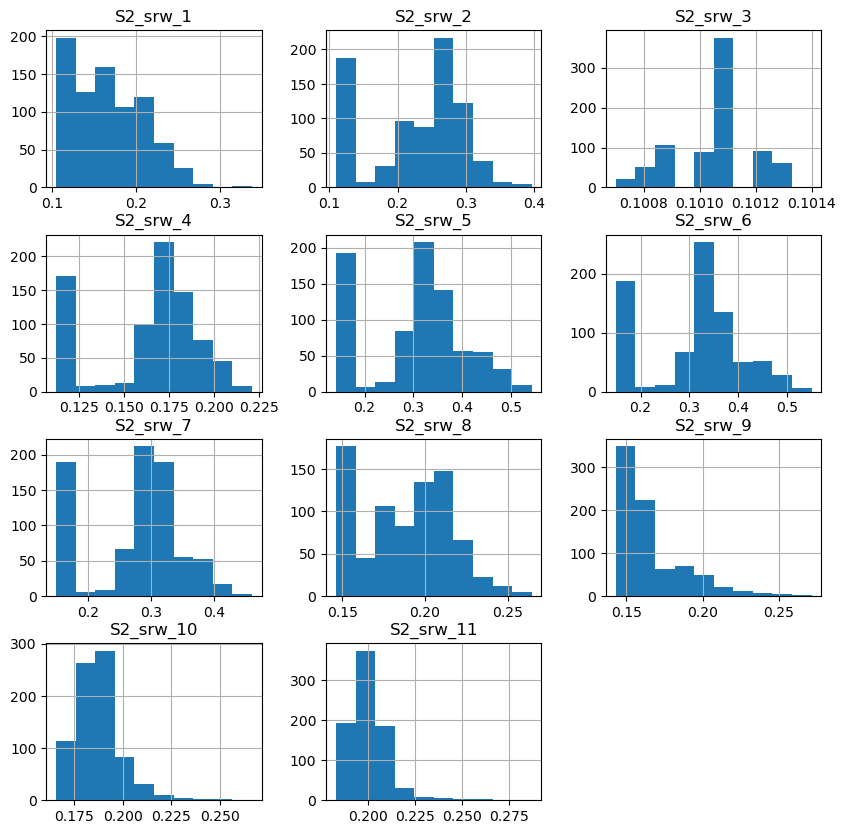

In [20]:
#We can also plot all numeric variables at the same time
fig=plt.figure(figsize=[10,10])
ax=fig.gca()
df.iloc[:,1:12].hist(ax=ax);

/tmp/ipykernel_6805/2950206938.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.iloc[:,1:12].plot(kind='box', subplots=True, sharex=False, layout=(3,4), sharey=False, ax=ax);


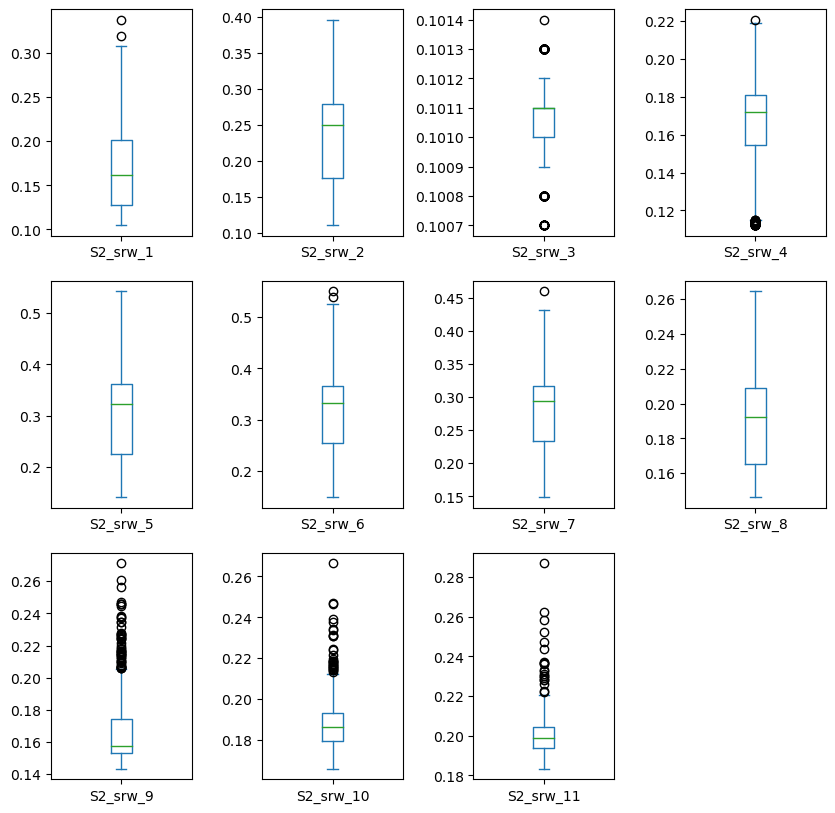

In [24]:
# undestandan data with box plot
fig=plt.figure(figsize=[10,10])
plt.subplots_adjust(wspace=0.5)
ax=fig.gca()
df.iloc[:,1:12].plot(kind='box', subplots=True, sharex=False, layout=(3,4), sharey=False, ax=ax);

<Figure size 640x480 with 0 Axes>

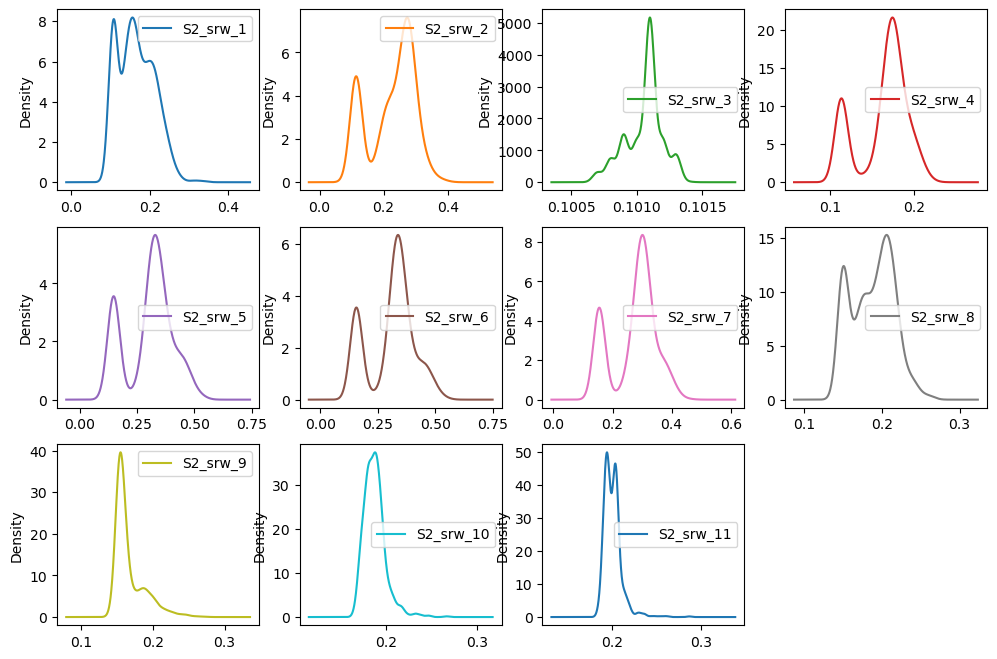

In [28]:
#let's look at the density plot of all bands
plt.subplots_adjust(wspace=0.8)
df.plot(kind='density', sharex=False, subplots=True, layout=(3,4),figsize=(12,8));

## Bivariate Exploration

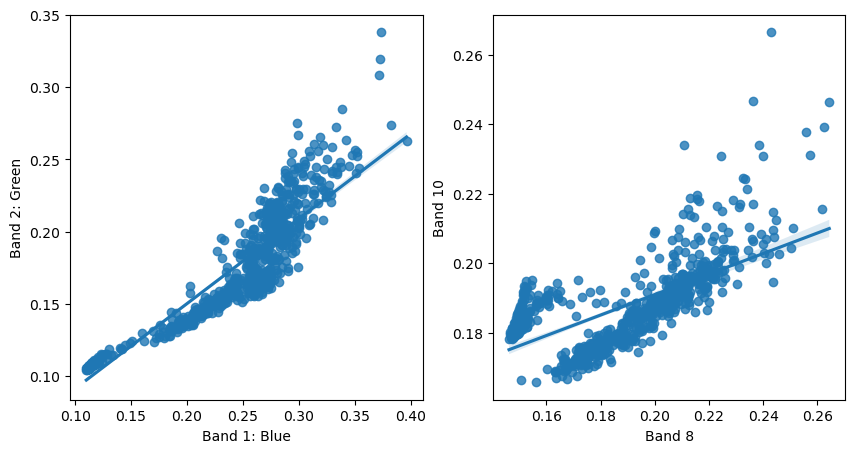

In [29]:
# Pairewise assessment of the ranking of happiness and the life expectancy VS GDP
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.regplot(data=df, x="S2_srw_2", y="S2_srw_1")
plt.xlabel("Band 1: Blue")
plt.ylabel("Band 2: Green")

plt.subplot(1,2,2)
sns.regplot(data=df, x="S2_srw_8", y="S2_srw_10")
plt.xlabel("Band 8")
plt.ylabel("Band 10");

## Multivariate Exploration


/home/drdc/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


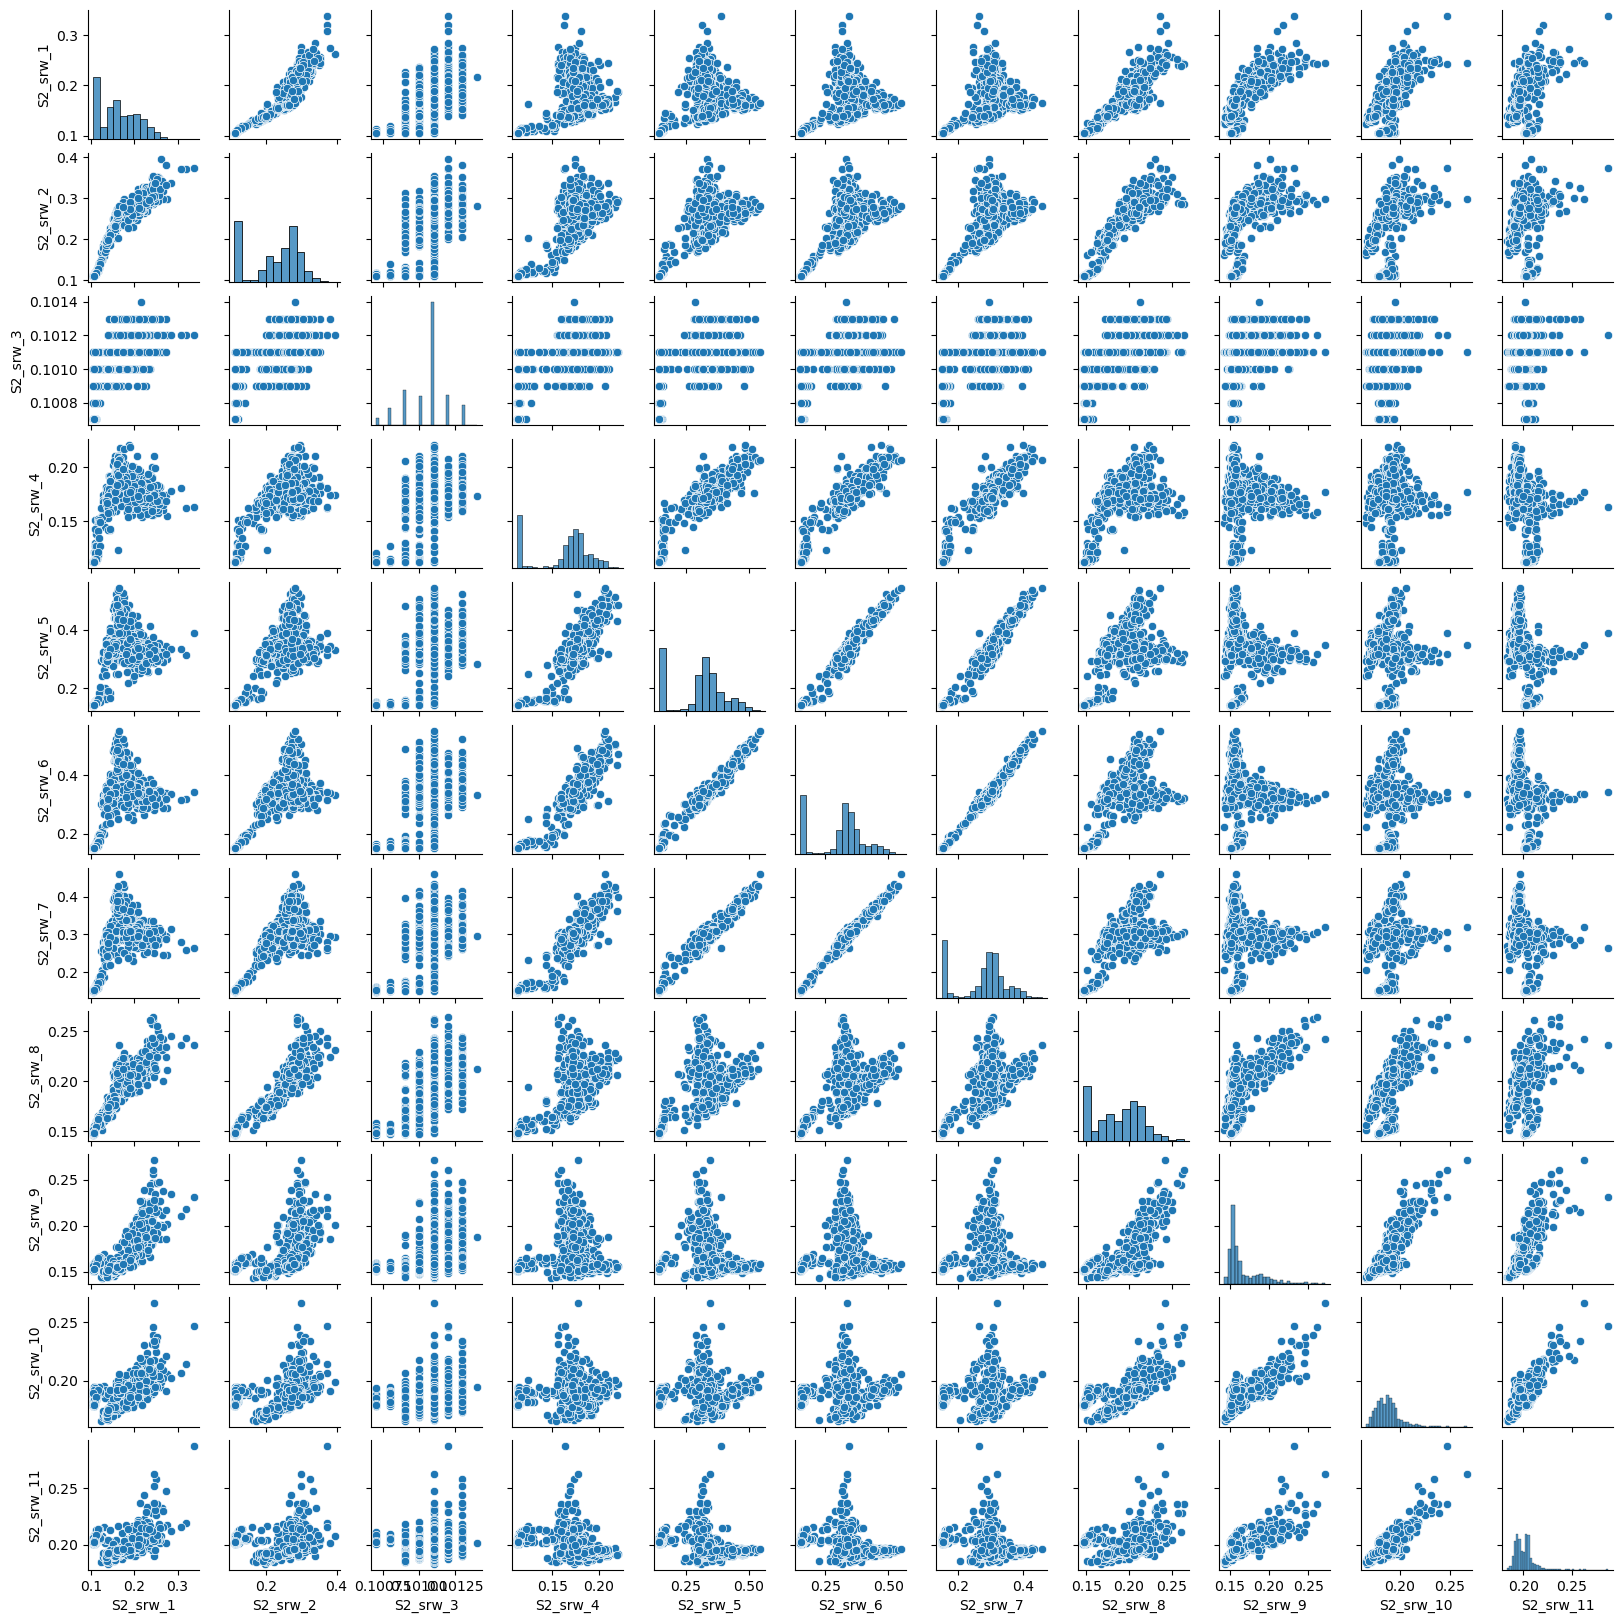

In [34]:
sns.pairplot(df.iloc[:,1:13],size=1.5);

> Based on this figure it can be hard to see the patterns in the data

> The relationship is not clear as we we have more data points



> Now we can see some patterns 


> For example the relationship between bands is much clear in the correlation matrix below

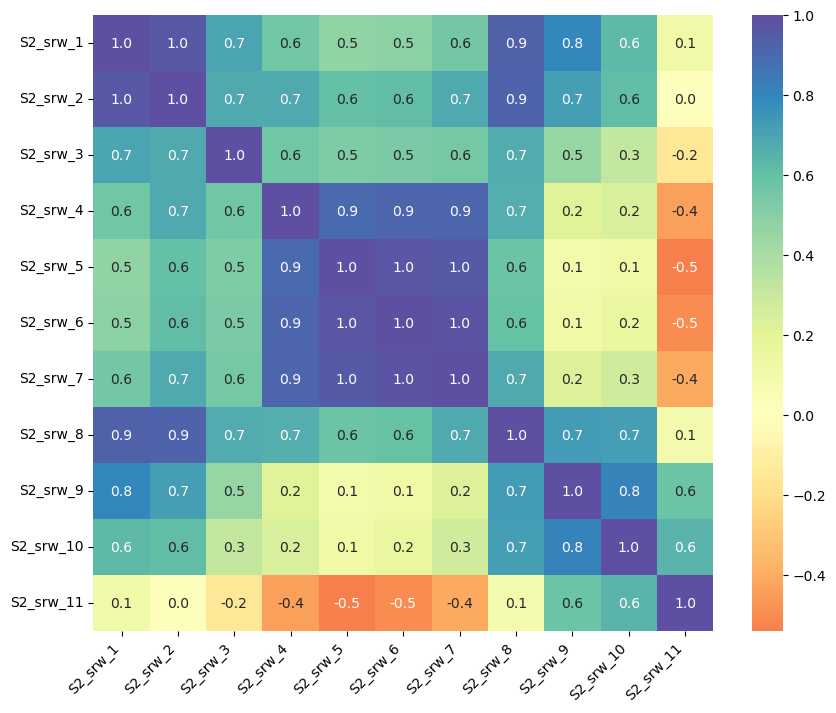

In [36]:
# Here we will present the spearman correlations coefficients between our variables that we calculate earlier

plt.figure(figsize=[10,8])
sns.heatmap(df.iloc[:,1:13].corr(method="spearman"), annot=True,cmap="Spectral",fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right");